In [47]:
from proj_1_module import *
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import math
plt.style.use(['science', 'notebook', 'grid'])

$$\mu = \frac{m_s * m_e}{m_s + m_e}$$
$$\frac{dH}{dp} = \frac{p}{\mu}$$
$$\frac{dH}{dq} = \frac{G(m_s+m_e)\mu}{r^3} r$$

<Figure size 1500x800 with 0 Axes>

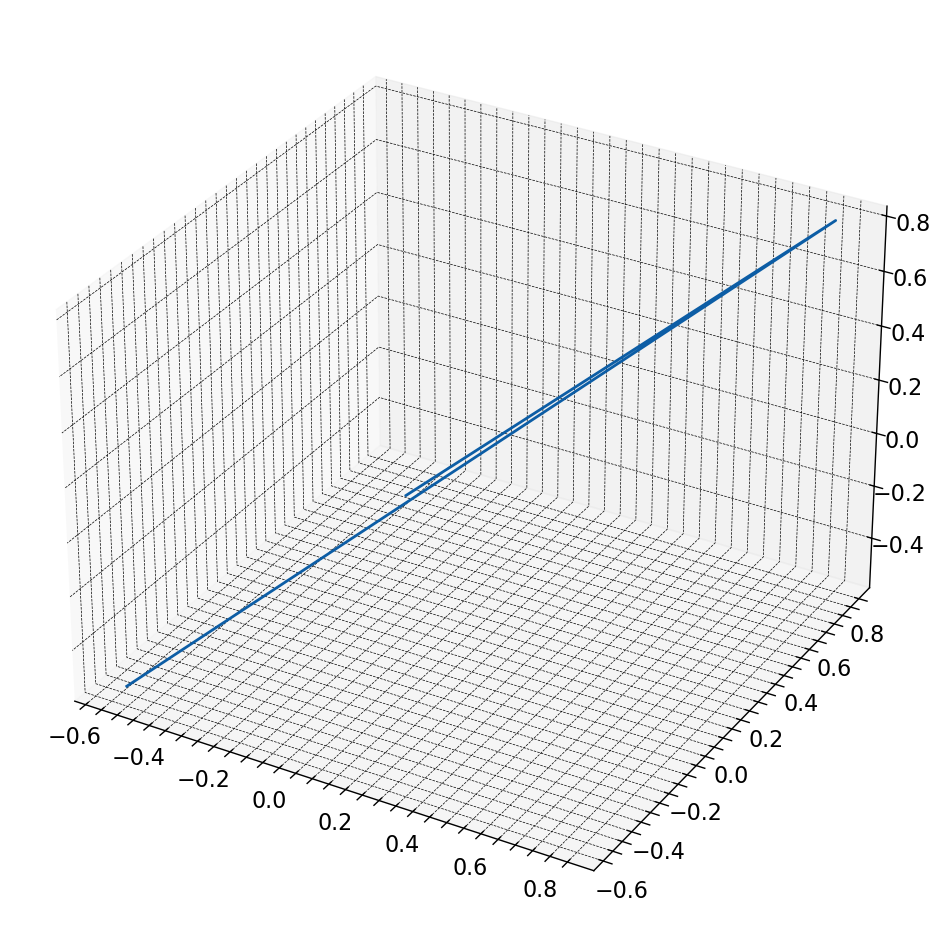

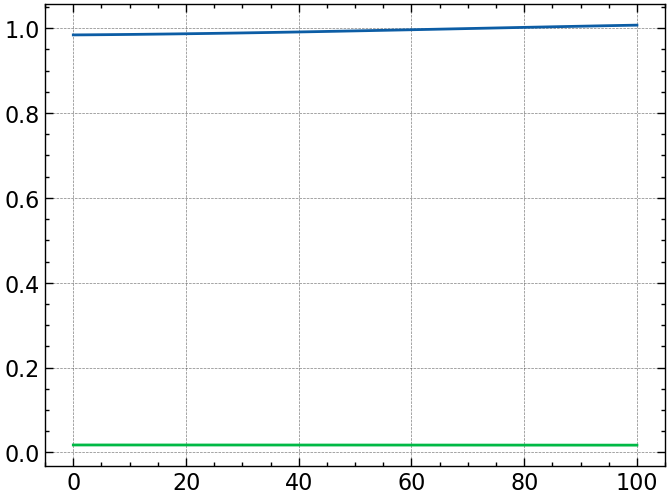

In [53]:
def DynamicTest(G_constant, m_0, m_1, Q0, V0, stepSize=0.1, total_time=10):
    G = G_constant
    M = m_0
    m = m_1
    mu = (m_0*m_1)/(m_0+m_1)
    P0 = V0*mu

    def dH_dq(q, p):
        return G*(M+m)*mu*q/np.linalg.norm(q)**3

    def dH_dp(q, p):
        return p/mu
    

    h = stepSize
    num_points = int(total_time / stepSize)
    methods = ["Euler", "RK2", "RK4", "SE", "SV"]
    T,Q, P = 0, 0, 0
    plt.figure(figsize=(15, 8))
    for method in methods:
        d = P0.size
        T, Q, P = hamiltonian_solve(dH_dq, dH_dp, d=d, t_0=0 , q_0 = Q0, p_0 = P0, h=h, N=num_points, method=methods[2])
    
    fig = plt.figure(figsize = (12,12))
    ax = plt.axes(projection='3d')
    ax.plot(Q[0,:], Q[1,:], Q[2,:])
    plt.show()
    return T, Q, P/mu

# au^3 solar_mass^-1 days^-2 for G
# distance in AU
# time in days
Q0 = np.array([-5.34743068e-01 , 8.26293951e-01, -3.61541763e-05])
V0 = np.array([-1.47187017e-02 ,-9.41540742e-03 ,-8.67603060e-08])
T, Q, V = DynamicTest(G_constant=2.959159*10**(-4), m_0=1, m_1=3.002513826043238e-06, Q0 = Q0, V0 = V0, stepSize=1, total_time=100)
plt.plot(T, np.sqrt(np.sum(Q**2, axis=1)).reshape(-1, 1))
plt.plot(T, np.sqrt(np.sum(V**2, axis=1)).reshape(-1, 1))
plt.show()



In [49]:
print(Q)

[[-5.34743068e-01  8.26293951e-01 -3.61541763e-05]
 [-5.49378786e-01  8.16750316e-01 -3.62353260e-05]
 [-5.63844043e-01  8.06953260e-01 -3.63052327e-05]
 [-5.78134404e-01  7.96905899e-01 -3.63638781e-05]
 [-5.92245494e-01  7.86611429e-01 -3.64112475e-05]
 [-6.06172996e-01  7.76073121e-01 -3.64473299e-05]
 [-6.19912660e-01  7.65294325e-01 -3.64721182e-05]
 [-6.33460295e-01  7.54278468e-01 -3.64856086e-05]
 [-6.46811779e-01  7.43029047e-01 -3.64878012e-05]
 [-6.59963054e-01  7.31549636e-01 -3.64786998e-05]
 [-6.72910131e-01  7.19843877e-01 -3.64583115e-05]
 [-6.85649091e-01  7.07915485e-01 -3.64266474e-05]
 [-6.98176083e-01  6.95768242e-01 -3.63837220e-05]
 [-7.10487330e-01  6.83405997e-01 -3.63295536e-05]
 [-7.22579127e-01  6.70832667e-01 -3.62641640e-05]
 [-7.34447842e-01  6.58052231e-01 -3.61875786e-05]
 [-7.46089919e-01  6.45068732e-01 -3.60998263e-05]
 [-7.57501879e-01  6.31886273e-01 -3.60009397e-05]
 [-7.68680319e-01  6.18509019e-01 -3.58909548e-05]
 [-7.79621914e-01  6.04941191e-

In [50]:
print(V)

[[-1.47187017e-02 -9.41540742e-03 -8.67603060e-08]
 [-1.45504876e-02 -9.67034549e-03 -7.55282156e-08]
 [-1.43778093e-02 -9.92220819e-03 -6.42760131e-08]
 [-1.42007253e-02 -1.01709157e-02 -5.30073611e-08]
 [-1.40192960e-02 -1.04163893e-02 -4.17259240e-08]
 [-1.38335829e-02 -1.06585516e-02 -3.04353657e-08]
 [-1.36436493e-02 -1.08973265e-02 -1.91393487e-08]
 [-1.34495595e-02 -1.11326392e-02 -7.84153217e-09]
 [-1.32513794e-02 -1.13644161e-02  3.45442907e-09]
 [-1.30491763e-02 -1.15925851e-02  1.47448864e-08]
 [-1.28430186e-02 -1.18170754e-02  2.60261989e-08]
 [-1.26329760e-02 -1.20378176e-02  3.72947342e-08]
 [-1.24191197e-02 -1.22547437e-02  4.85468709e-08]
 [-1.22015219e-02 -1.24677872e-02  5.97789989e-08]
 [-1.19802558e-02 -1.26768830e-02  7.09875219e-08]
 [-1.17553962e-02 -1.28819676e-02  8.21688578e-08]
 [-1.15270186e-02 -1.30829790e-02  9.33194408e-08]
 [-1.12951998e-02 -1.32798566e-02  1.04435723e-07]
 [-1.10600176e-02 -1.34725414e-02  1.15514173e-07]
 [-1.08215507e-02 -1.36609760e-